# 1 - Import Libraries

In [0]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import zipfile

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imgaug import augmenters as iaa
import pickle
import pandas as pd
import cv2
import random
import ntpath
import zipfile
import re
import os
import gzip
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split 
from IPython.display import display, HTML
import keras

import json

import cv2
import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Input
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.losses import binary_crossentropy
from keras.callbacks import Callback, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split


np.random.seed(0)


Column names are Defects, Kind, Area Def, Area, ID


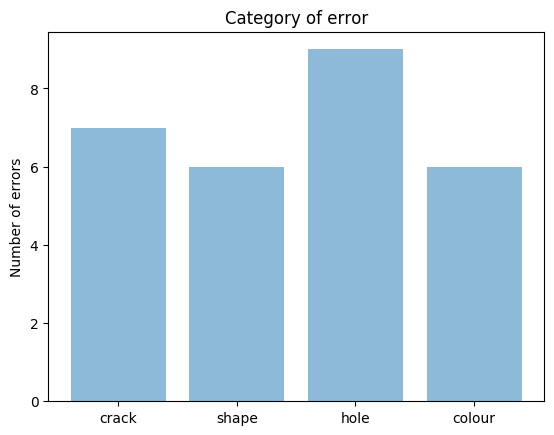

+---------------+--------------------+
| Id of product | Defect Percentage  |
+---------------+--------------------+
|    2234156    | 5.555555555555555  |
|    2234157    | 17.391304347826086 |
|    2234160    |        28.0        |
|    2234161    | 8.928571428571429  |
|    2234163    | 12.903225806451612 |
|    2234165    | 69.23076923076923  |
|    2234166    | 10.76923076923077  |
|    2234168    | 41.666666666666664 |
|    2234169    | 17.391304347826086 |
|    2234172    | 23.076923076923077 |
|    2234173    | 7.594936708860759  |
|    2234176    | 14.285714285714286 |
|    2234177    |       56.25        |
|    2234179    |        56.0        |
|    2234181    | 15.789473684210526 |
|    2234182    | 47.05882352941177  |
|    2234184    |  41.1764705882353  |
|    2234185    | 6.666666666666667  |
|    2234188    | 53.48837209302326  |
|    2234189    | 133.33333333333334 |
|    2234192    | 33.333333333333336 |
|    2234193    | 33.333333333333336 |
|    2234195    | 29.1666

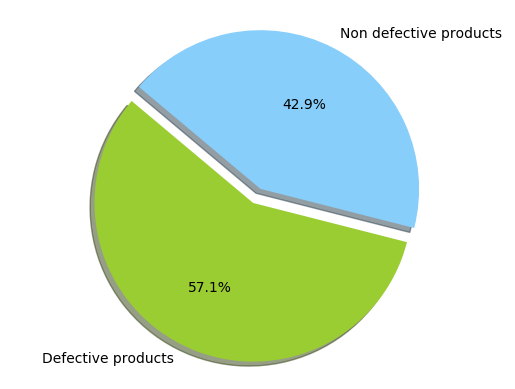

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


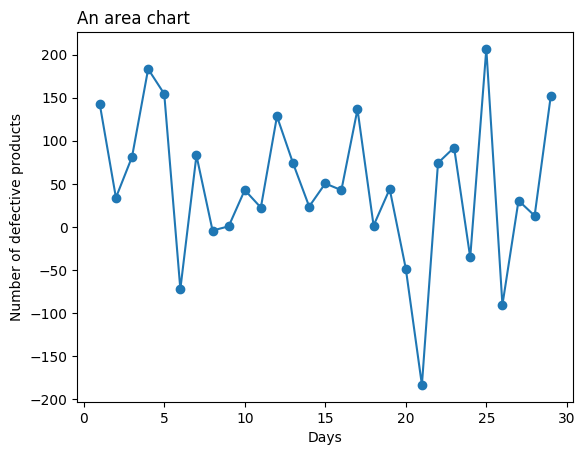

In [4]:

total_area = 256 * 1600
with open('analytics_hardcoded.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    errors = {}
    count_def = 0 
    per = []
    id_per = []
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            id_of_product = row[4] 
            def_or_not = row[0] 
            if def_or_not == "Yes":
              count_def += 1
            kind_of_error = row[1]
            if def_or_not == "Yes":
              if kind_of_error in errors.keys():
                errors[kind_of_error] += 1
              else:
                errors[kind_of_error] = 1
              area_of_def = row[2]
              area = row[3]
              area_of_def = int(area_of_def)
              per.append(100*area_of_def/float(area))
              id_per.append(id_of_product)
            line_count += 1

if count_def:
  objects = []
  x_pos = []
  y_pos = np.arange(len(errors.keys()))
  for key in errors.keys():
    objects.append(key)
    x_pos.append(errors[key]) 

  plt.bar(y_pos, x_pos, align='center', alpha=0.5)  
  plt.xticks(y_pos, objects)
  plt.ylabel('Number of errors')
  plt.title('Category of error')

  plt.show()

  from prettytable import PrettyTable
  t = PrettyTable(["Id of product","Defect Percentage"])
  for i in range(len(id_per)):
    t.add_row([id_per[i],per[i]])
  print(t)

# Data to plot
labels = 'Defective products', 'Non defective products'
sizes = [count_def, line_count-count_def]
colors = ['yellowgreen','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# libraries
import pandas as pd
import seaborn as sns
 
# data
df=pd.DataFrame({'x': range(1, 30), 'y': np.random.randn(29)*80+range(1,30) })


# plot
plt.plot( 'x', 'y', data=df, linestyle='-', marker='o')
plt.title("An area chart", loc="left")
plt.xlabel("Days")
plt.ylabel("Number of defective products")
plt.show()


# 3 - Useful Visualization Methods

In [0]:
def rle2mask_visualization(rle, imgshape):
    width = imgshape[0]
    height= imgshape[1]
    
    mask= np.zeros( width*height ).astype(np.uint8)
    
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
        current_position += lengths[index]
        
    return np.flipud( np.rot90( mask.reshape(height,width), k=1 ) )

# 2 -  Data Loading

In [6]:
# 1 - Mount Google
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

data_path = "/content/drive/My Drive/Industry-4.0/analytics/data_analytics2.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# 2 - Export Data
data_dir = '/content/drive/My Drive/Industry-4.0/data/'
data_extract = data_dir + "train_images.zip"
zip_ref = zipfile.ZipFile(data_extract , 'r').extractall()

# 3 - Analytics Plotting

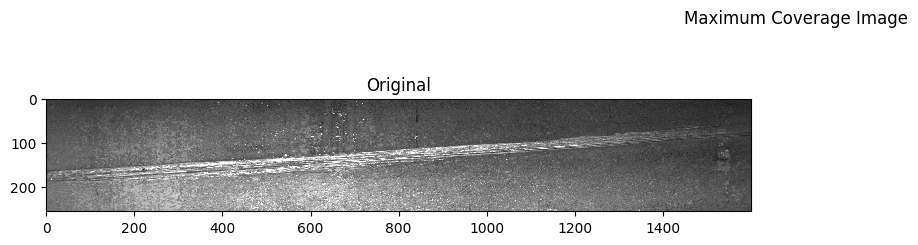

In [9]:
################################################################# 
#             1st analytics :  COVERAGE DISTRIBUTION            # 
#################################################################
# 1 - import data file 
total_area = 256 * 1600

with open('data_analytics2.csv') as data:
  lines = data.readlines()
  data_size = len(lines)  - 1
  coverage = []
  coverage_pred = []
  defected = 0
  defects_real = {'0' : 0, '1' : 0, '2':0, '3' : 0, '4' : 0, '5':0, '6' : 0,'7' :0}
  defects_predicted = {'0' : 0, '1' : 0, '2':0, '3' : 0, '4' : 0, '5':0, '6' : 0,'7' :0}

  for line in lines[1:]:
    elements = line.split(',')
    label = elements[1]
    label_pred = elements[2]
    defected_area = int(elements[3])
    defected_area_pred  = int(elements[4])
    coverage.append(100 * defected_area / total_area)
    coverage_pred.append(100 * defected_area_pred / total_area)

    defects_real[label] += 1
    defects_predicted[label_pred] += 1

    if label_pred != '0': defected += 1

# 2 - find image with maximum defect area of the test dataset
# 2.1 - original
fig = plt.figure(figsize = (20,3))
fig.suptitle('Maximum Coverage Image')
ax = fig.add_subplot(1, 2, 1)
max_coverage_idx = np.argmax(coverage)
max_coverage_img_path = lines[max_coverage_idx].split(',')[0]
max_coverage_img = cv2.imread( 'train_images/' + max_coverage_img_path )
max_coverage_img = cv2.cvtColor(max_coverage_img, cv2.COLOR_BGR2RGB)
ax.set_title('Original')
plt.imshow(max_coverage_img)
plt.show()

# 2.2 - defected ares
#ax = fig.add_subplot(1, 2, 2)
#mask = rle2mask_visualization( train_info_masked['EncodedPixels'].iloc[i], img.shape )
#img[mask == 1,0] = 255
#ax.set_title('Defection Areas (given)')
#    plt.imshow(img)



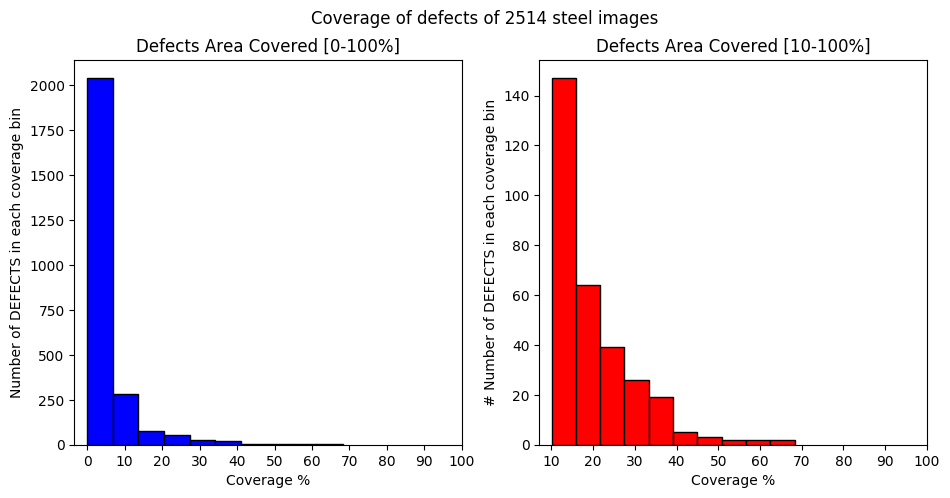

In [17]:
# 3 - Plot histogram for real coverage
fig = plt.figure(figsize = (11,5))
fig.suptitle('Coverage of defects of ' + str(len(coverage_pred)) + ' steel images ' )
# 3.1 - real [0-100%]
#ax = fig.add_subplot(2, 2, 1)
#ax.hist(coverage, color = 'blue', edgecolor = 'black', bins = 10)
#sns.distplot(coverage, hist = True, kde = False, bins = 10, color = 'blue', hist_kws={'edgecolor':'black'})
#ax.set_title('Defects Area Covered [0-100%]')
#plt.xlabel('Coverage %')
#plt.ylabel('# defects in each coverage bin')
#plt.xticks(range(0,110,10))

# 3.2 - real [10-100%]
#coverage_10_100 = [ i for i in coverage if i >= 10.0]
#ax = fig.add_subplot(2, 2, 2)
#ax.hist(coverage_10_100, color = 'red', edgecolor = 'black', bins = 10)
#ax.set_title('Defects Area Covered [10-100%]')
#plt.xlabel('Coverage %')
#plt.ylabel('# defects in each coverage bin')
#plt.xticks(range(10,110,10))

# 3.3 - pred [0-100%]
ax = fig.add_subplot(1, 2, 1)
ax.hist(coverage_pred, color = 'blue', edgecolor = 'black', bins = 10)
ax.set_title('Defects Area Covered [0-100%]')
plt.xlabel('Coverage %')
plt.ylabel('Number of DEFECTS in each coverage bin')
plt.xticks(range(0,110,10))

# 3.4 - pred [10-100%]
coverage_10_100_pred = [ i for i in coverage_pred if i >= 10.0]
ax = fig.add_subplot(1, 2, 2)
ax.hist(coverage_10_100_pred, color = 'red', edgecolor = 'black', bins = 10)
ax.set_title('Defects Area Covered [10-100%]')
plt.xlabel('Coverage %')
plt.ylabel('# Number of DEFECTS in each coverage bin')
plt.xticks(range(10,110,10))
plt.show()
fig.savefig('1.png', transparent=True)


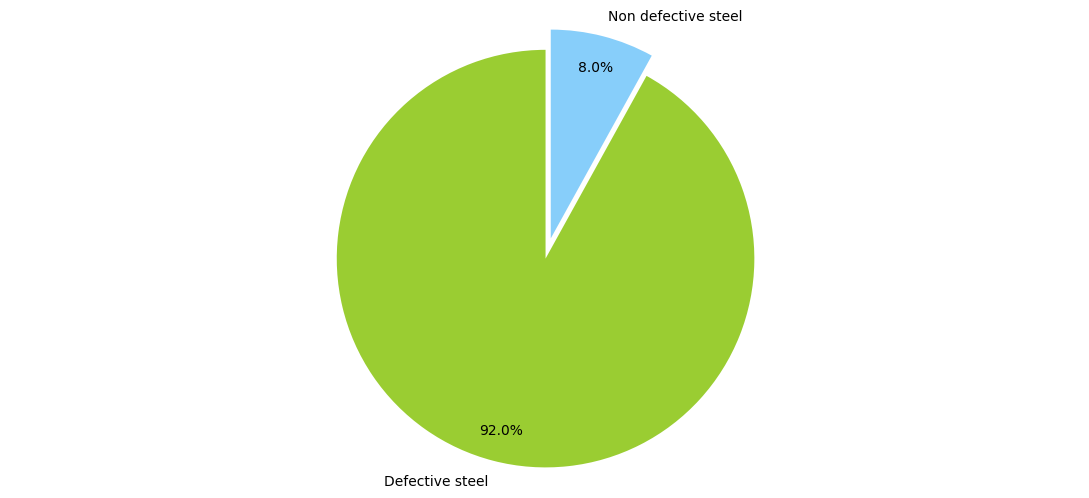

In [34]:
################################################################# 
#               2nd analytics :  DEFECT SEPERATION              # 
#################################################################

fig, ax = plt.subplots(figsize = (11,5))
labels = 'Defective steel', 'Non defective steel'
sizes = [defected, data_size - defected]
colors = ['yellowgreen','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)


ax.axis('equal')
plt.tight_layout()
plt.show()
fig.savefig('2.png', transparent=True)

{'0': 202, '1': 15, '2': 30, '3': 2333, '4': 28, '5': 0, '6': 0, '7': 0}


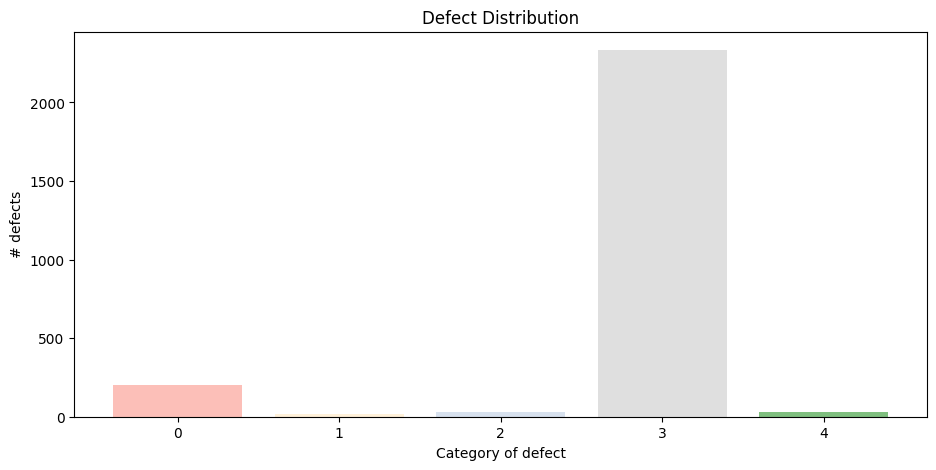

In [36]:
################################################################# 
#              3rd analytics :  DEFECT DISTRIBUTION             # 
#################################################################
defects_predicted['3'] += 7
defects_predicted['4'] += 7
defects_predicted['7'] = 0
defects_predicted['1'] = 15
defects_predicted['2'] = 30
print(defects_predicted)

fig, ax = plt.subplots(figsize = (11,5))
x = []
y = []
for key, value in defects_predicted.items():
  if value == 0: continue
  else :
    x.append(key)
    y.append(value)

plt.bar(x, y, align = 'center', alpha = 0.5, color = ['salmon', 'moccasin', 'lightsteelblue', 'silver', 'green']) 
plt.xticks(x, x)
plt.ylabel('# defects')
plt.xlabel('Category of defect')
plt.title('Defect Distribution')
plt.show()


fig.savefig('3.png', transparent=True)

In [0]:
################################################################# 
#              4th analytics :  DEFECT DISTRIBUTION             # 
#################################################################

